In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
%matplotlib inline
matplotlib.pyplot.style.use = 'ggplot'

# First, load up the data
First you're going to want to create a data frame from the `dailybots.csv` file which can be found in the `data` directory.  You should be able to do this with the `pd.read_csv()` function.  Take a minute to look at the dataframe because we are going to be using it for this entire worksheet.

In [2]:
data = pd.read_csv( '../../data/dailybots.csv' )
#Look at a summary of the data
data.describe()

,hosts,orgs
count,4969.000000,4969.00000
mean,142.308110,15.31133
std,240.955294,21.15150
min,1.000000,1.00000
25%,10.000000,3.00000
50%,38.000000,7.00000
75%,187.000000,16.00000
max,2031.000000,122.00000


In [3]:
data['botfam'].value_counts()

Sality         540
Ramnit         540
Zeus           540
ConfickerAB    540
zeroaccess     538
Bedep          535
Necurs         511
Zusy           498
PushDo         418
Olmasco        309
Name: botfam, dtype: int64

## Exercise 1: Which industry sees the most Ramnit infections? Least?

Count the number of infected days for "Ramnit" in each industry industry. 
How: 
1.  First filter the data to remove all the infections we don't care about
2.  Aggregate the data on the column of interest. HINT:  You might want to use the `groupby()` function
3.  Add up the results 

In [4]:
grouped_df = data[data.botfam == "Ramnit"].groupby(['industry'])
grouped_df.sum()

,hosts,orgs
industry,,
Education,7492,3949
Finance,2281,1357
Government/Politics,4484,448
Healthcare/Wellness,544,473
Manufacturing,46303,1155
Retail,17649,558


# Exercise 2: Calculate the min, max, median and mean infected orgs for each bot family, sort by median
In this exercise, you are asked to calculate the min, max, median and mean of infected orgs for each bot family sorted by median.  HINT:
1.  Using the `groupby()` function, create a grouped data frame
2.  You can do this one metric at a time OR you can use the .agg() function. You might want to refer to the documentation here:  http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once
3.  Sort the values (HINT HINT) by the median column

In [5]:
group2 = data[['botfam','orgs']].groupby( ['botfam'])
summary = group2.agg([np.min, np.max, np.mean, np.median, np.std])
summary.sort_values( [('orgs', 'median')], ascending=False)

orgs                                  
            amin amax       mean median        std
botfam                                            
ConfickerAB   27  122  63.035185   56.5  25.619679
Sality         2   43  15.909259   12.0   9.961946
Necurs         1  115  16.739726   11.0  16.644046
Ramnit         1   60  14.703704    9.0  14.485780
Zeus           1   36   9.988889    8.0   6.687004
Bedep          1   42   8.016822    6.0   6.192125
zeroaccess     1   19   5.481413    5.0   2.999787
Zusy           1   20   5.279116    4.0   4.204578
PushDo         1   12   2.882775    2.0   2.535719
Olmasco        1    6   1.592233    1.0   0.722148

# Exercise 3: Which date had the total most bot infections and how many infections on that day?
In this exercise you are asked to aggregate and sum the number of infections (hosts) by date.  Once you've done that, the next step is to sort in descending order. 


In [6]:
df3 = data[['date','hosts']].groupby('date').sum()
df3.sort_values(by='hosts', ascending=False).head(10)

,hosts
date,
2016-06-02,11352
2016-06-08,10716
2016-06-09,10476
2016-06-07,10383
2016-06-03,10336
2016-06-06,10125
2016-06-10,10106
2016-06-14,9820
2016-06-15,9738


# Exercise 4: Plot the daily infected hosts for Necurs, Ramnit and PushDo
In this exercise you're going to plot the daily infected hosts for three infection types.  In order to do this, you'll need to do the following steps:
1.  Filter the data to remove the botfamilies we don't care about. 
2.  Use `groupby()` to aggregate the data by date and family, then sum up the hosts in each group
3.  Plot the data.  Hint:  You might want to use the `unstack()` function to prepare the data for plotting. 

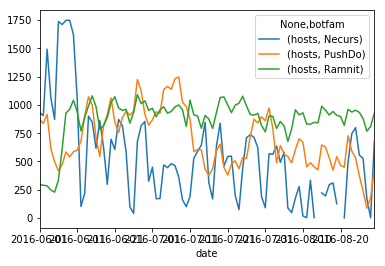

In [7]:
filteredData = data[ data['botfam'].isin(['Necurs', 'Ramnit', 'PushDo']) ][['date', 'botfam', 'hosts']]
groupedFilteredData = filteredData.groupby( ['date', 'botfam']).sum()
groupedFilteredData.unstack(level=1).plot(kind='line', subplots=False)

# Exercise 5: What are the distribution of infected hosts for each day-of-week across all bot families?

Hint: try a box plot and/or violin plot.  In order to accomplish this, you'll have to get the data into the format shown below:

|  |date|hosts|day|
|--|----|-----|---|
|469|	2016-06-09|	247	|Thursday|
|206|	2016-06-04	|201	|Saturday|
|34|	2016-06-01	|144|	Wednesday|
|4685|	2016-08-24	|8|	Wednesday|

In order to do this, there are a few steps:
1.  First convert the date to a date object.
2.  Next, use this column to add two new columns to the dataset: the day of the week and the integer representation of that.  http://pandas.pydata.org/pandas-docs/stable/timeseries.html
3.  Sort the data by the date
4.  You'll want to group the data by the day number and sum up the hosts.
5.  Next, use the `.boxplot()` method to plot the data. This has grouping built in, so you don't have to group by first.

Try plotting the data using Seaborn.

/Users/cgivre/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


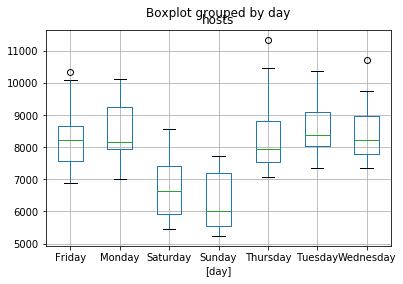

In [8]:
data.date  = pd.to_datetime( data.date )
data['day'] = data.date.dt.weekday_name
data['day_num'] = data.date.dt.dayofweek
day_data = data[['date','hosts', 'day']]


grouped_day_data = day_data.groupby('date', as_index=False).sum()

grouped_day_data['day'] = grouped_day_data['date'].dt.weekday_name
grouped_day_data['day_number'] = grouped_day_data['date'].dt.dayofweek
grouped_day_data.sort_values(by='day_number', inplace=True, ascending=True)
grouped_day_data[['day','hosts']].boxplot(by="day")

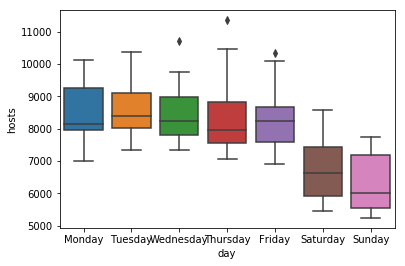

In [65]:
sns.boxplot( data=grouped_day_data, x="day",y="hosts")